<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Modelagem de Séries Temporais e Real-Time Analytics com Apache Spark e Databricks</font>
## <font color='blue'>Projeto 6</font>
### <font color='blue'>Modelagem Preditiva de Séries Temporais Irregulares</font>

## Carregando os Pacotes

In [1]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [2]:
# Imports
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

## Carregando e Compreendendo os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('/opt/spark/dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(32440, 4)

In [5]:
# Amostra dos dados
df_dsa.head()

,data_venda,preco,tipo_imovel,numero_quartos
0,2011-02-07 0:00,525000,casa,4
1,2011-02-27 0:00,290000,casa,3
2,2011-03-07 0:00,328000,casa,3
3,2011-03-09 0:00,380000,casa,4
4,2011-03-21 0:00,310000,casa,3


In [6]:
# Amostra dos dados
df_dsa.tail()

,data_venda,preco,tipo_imovel,numero_quartos
32435,2024-07-25 0:00,500000,apartamento,3
32436,2024-07-25 0:00,560000,apartamento,2
32437,2024-07-26 0:00,464950,apartamento,2
32438,2024-07-26 0:00,589000,apartamento,2
32439,2024-07-26 0:00,575000,apartamento,2


In [7]:
# Tipos de dados
df_dsa.dtypes

data_venda        object
preco              int64
tipo_imovel       object
numero_quartos     int64
dtype: object

In [8]:
# Valores únicos
df_dsa['tipo_imovel'].unique()

array(['casa', 'apartamento'], dtype=object)

In [9]:
# Coloca a data como índice
df_dsa.index = pd.to_datetime(df_dsa.data_venda)

In [10]:
# Não precisamos mais da coluna original
df_dsa = df_dsa.drop(columns = ['data_venda'])

In [11]:
# Amostra dos dados
df_dsa.head()

,preco,tipo_imovel,numero_quartos
data_venda,,,
2011-02-07,525000,casa,4
2011-02-27,290000,casa,3
2011-03-07,328000,casa,3
2011-03-09,380000,casa,4
2011-03-21,310000,casa,3


In [12]:
# Amostra dos dados
df_dsa.tail()

,preco,tipo_imovel,numero_quartos
data_venda,,,
2024-07-25,500000,apartamento,3
2024-07-25,560000,apartamento,2
2024-07-26,464950,apartamento,2
2024-07-26,589000,apartamento,2
2024-07-26,575000,apartamento,2


## Testando a Estacionaridade

Procurando se o conjunto de dados é estacionário ou não estacionário usando o método Dicky Fuller aumentado.

**Se o valor-p > 0,05, então a coluna é não estacionária, caso contrário, é estacionária.**

- **Estacionário**: Se os dados têm média e variância quase constantes.
- **Não estacionário**: Média e variância não são constantes ao longo do tempo.

In [13]:
print(f"Valor-p da Coluna de Número de Quartos: {adfuller(df_dsa['numero_quartos'])[1]}")

Valor-p da Coluna de Número de Quartos: 0.0046085725629690846


In [14]:
print(f"Valor-p da Coluna de Preço: {adfuller(df_dsa['preco'])[1]}")

Valor-p da Coluna de Preço: 4.76338493150461e-18


> As duas colunas (as duas séries) são estacionárias.

## Análise Exploratória

In [15]:
df_dsa.columns

Index(['preco', 'tipo_imovel', 'numero_quartos'], dtype='object')

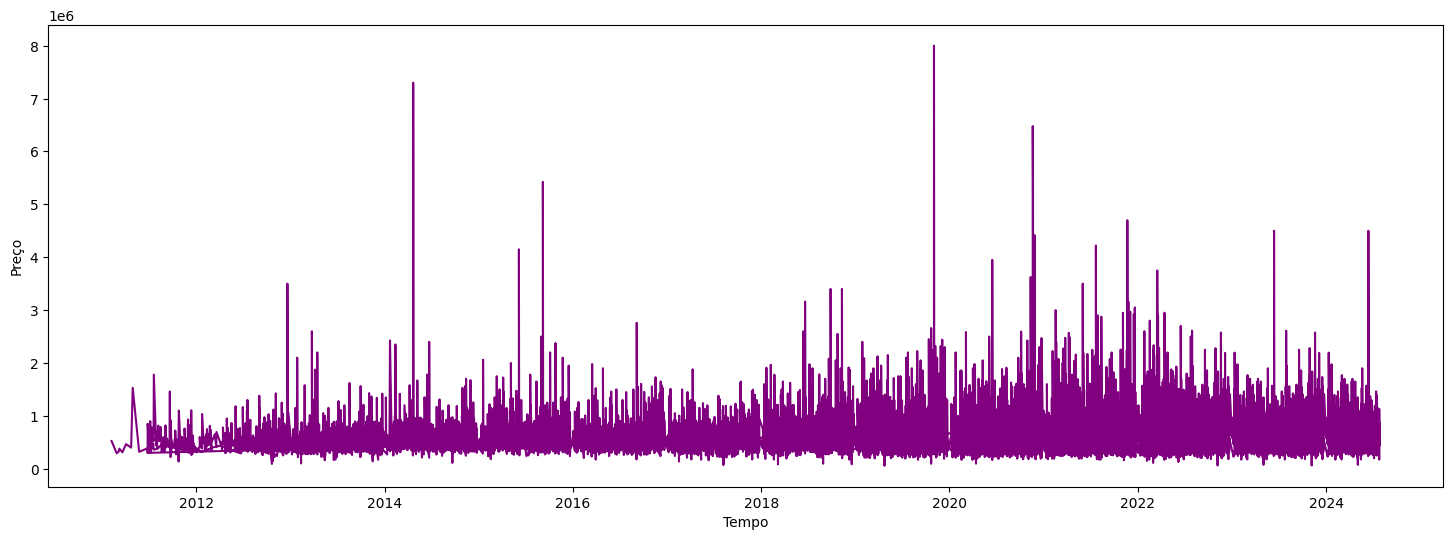

In [16]:
# Visualizando a série temporal de preço com todos os dados
plt.figure(figsize = (18,6))
plt.plot(df_dsa['preco'], color = 'purple')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.show()

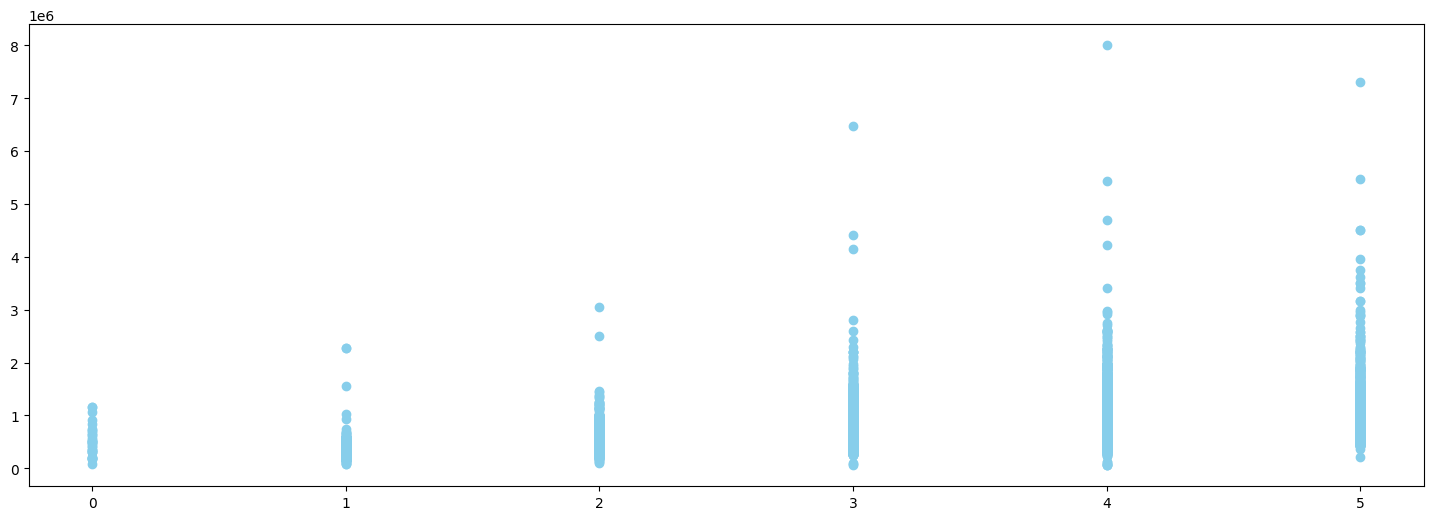

In [17]:
# Scatter Plot entre as variáveis de preço e número de quartos
plt.figure(figsize = (18,6))
plt.scatter(df_dsa['numero_quartos'], df_dsa['preco'], color = 'skyblue')
plt.show()

## Verificando a Assimetria dos Dados

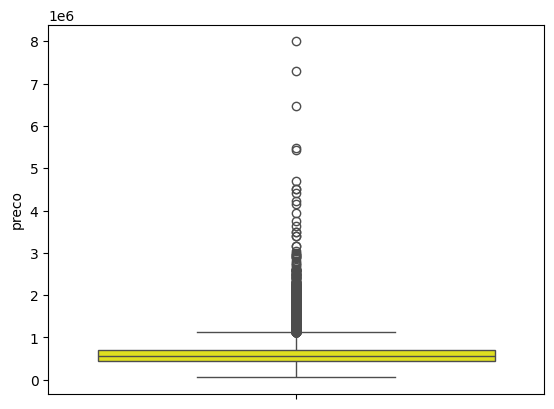

In [18]:
# Boxplot da variável de preço
sns.boxplot(df_dsa['preco'], color = 'yellow')
plt.show()

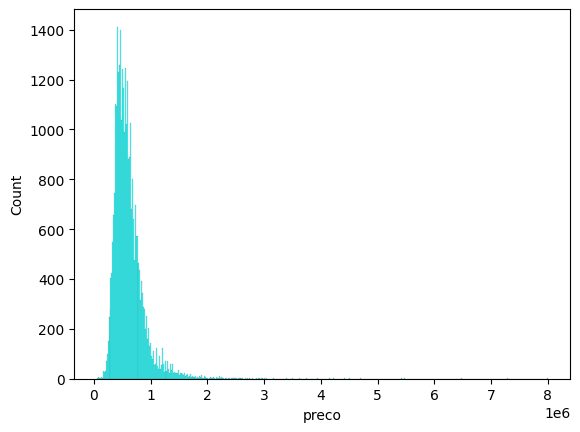

In [19]:
# Histograma da variável de preço
sns.histplot(df_dsa['preco'], color = 'cyan')
plt.show()

Os gráficos Boxplot e Histograma indicam forte assimetria à direita, o que é uma distribuição de dados ruim. Para remover a assimetria, podemos usar uma simples transformação de log.

Explicação:

Foi detectada uma forte assimetria à direita nos dados, o que sugere que os valores estão concentrados à esquerda da distribuição, com uma cauda longa se estendendo para a direita. Isso é frequentemente considerado indesejável em análises estatísticas, pois pode influenciar de forma negativa a interpretação dos resultados.

Uma “distribuição de dados ruim”, não significa intrinsecamente que os dados são inválidos ou inúteis, mas sim que a distribuição dos dados pode não atender às premissas de determinados métodos estatísticos, especialmente aqueles que assumem normalidade na distribuição dos dados.

A transformação de log é uma técnica comum usada para lidar com distribuições assimétricas à direita. Ela pode ajudar a "suavizar" a assimetria e trazer os dados para uma escala mais uniforme e simétrica, tornando-os mais aptos para análises que assumem normalidade.

## Transformação de Log

In [20]:
df_dsa.columns

Index(['preco', 'tipo_imovel', 'numero_quartos'], dtype='object')

In [21]:
# Aplica a transformação de log na variável alvo
df_dsa['preco'] = np.log(df_dsa['preco'])

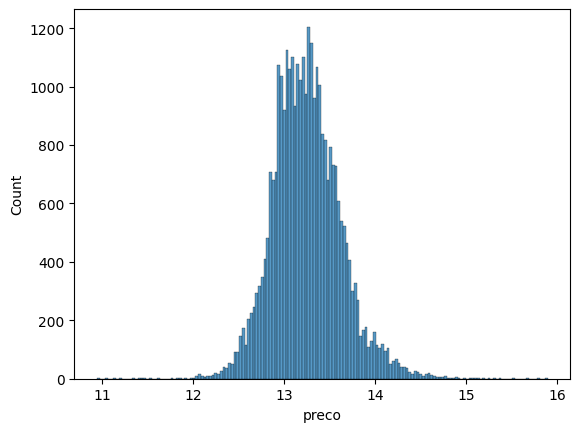

In [22]:
# Histograma
sns.histplot(df_dsa['preco'])
plt.show()

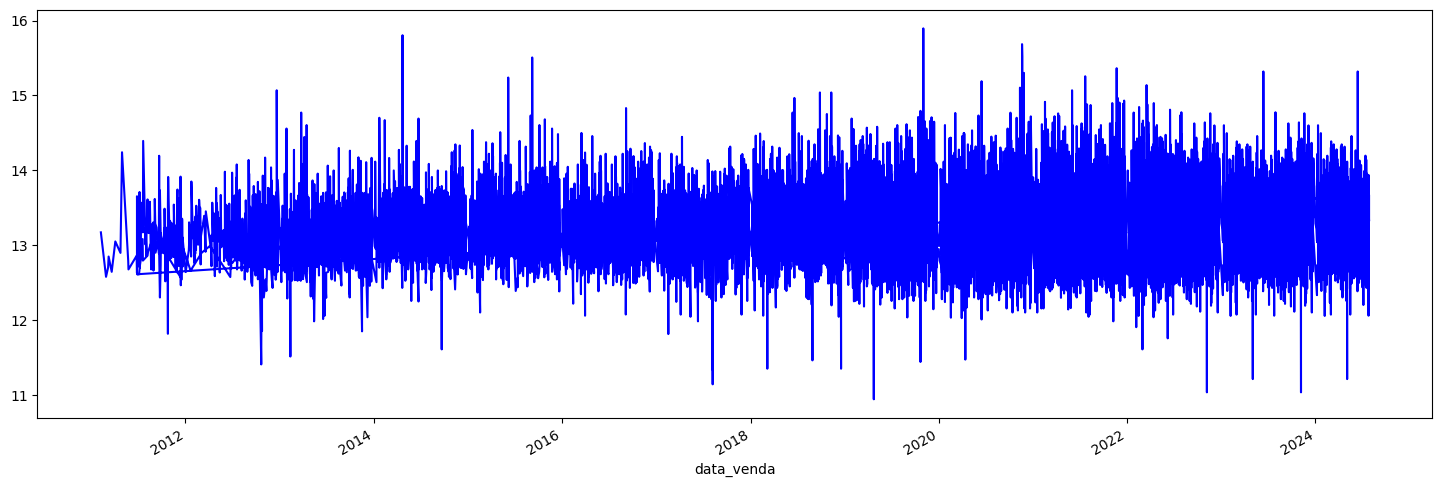

In [23]:
# Plot da variável
df_dsa.preco.plot(figsize = (18,6), color = 'blue')
plt.show()

## Estratégia de Tratamento da Série Temporal Irregular

Há diversas possibilidades para modelar séries irregulares, mas uma das melhores estratégias é transformar a série em regular!

Como o conjunto de dados não contém dados regulares/diários, podemos usar dados médios mensais. Isso nos dará pelo menos dados regulares.

In [24]:
# Aplica o encoding na variável categórica para convertê-la em numérica
df_dsa['tipo_imovel'] = LabelEncoder().fit_transform(df_dsa['tipo_imovel'])

In [25]:
df_dsa.head()

,preco,tipo_imovel,numero_quartos
data_venda,,,
2011-02-07,13.171154,1,4
2011-02-27,12.577636,1,3
2011-03-07,12.700769,1,3
2011-03-09,12.847927,1,4
2011-03-21,12.644328,1,3


In [26]:
# Reamostrando a série para que seja mensal
df_dsa = df_dsa.resample('ME').mean()

In [27]:
df_dsa.head(10)

,preco,tipo_imovel,numero_quartos
data_venda,,,
2011-02-28,12.874395,1.000000,3.500000
2011-03-31,12.731008,1.000000,3.333333
2011-04-30,13.395763,1.000000,3.666667
2011-05-31,12.733577,1.000000,3.000000
2011-06-30,13.076171,0.833333,3.333333
2011-07-31,13.195712,0.842105,3.263158
2011-08-31,13.092396,0.913043,3.391304
2011-09-30,13.154373,0.700000,3.300000
2011-10-31,13.037159,0.900000,3.300000


In [28]:
df_dsa.tail(10)

,preco,tipo_imovel,numero_quartos
data_venda,,,
2023-10-31,13.316378,0.738676,3.118467
2023-11-30,13.307367,0.749216,3.112853
2023-12-31,13.340488,0.767123,3.127854
2024-01-31,13.226898,0.700730,3.000000
2024-02-29,13.271742,0.710784,3.009804
2024-03-31,13.311664,0.750000,3.161017
2024-04-30,13.314660,0.740566,3.179245
2024-05-31,13.303070,0.763636,3.190909
2024-06-30,13.371549,0.769841,3.396825


> Temos um problema aqui. Qual é o problema?

In [29]:
# A variável tipo de imóvel não pode ser agrupada adequadamente por mês. Vamos removê-la.
df_dsa.drop('tipo_imovel', axis = 1, inplace = True)

In [30]:
df_dsa.head()

,preco,numero_quartos
data_venda,,
2011-02-28,12.874395,3.500000
2011-03-31,12.731008,3.333333
2011-04-30,13.395763,3.666667
2011-05-31,12.733577,3.000000
2011-06-30,13.076171,3.333333


In [31]:
df_dsa.tail()

,preco,numero_quartos
data_venda,,
2024-03-31,13.311664,3.161017
2024-04-30,13.314660,3.179245
2024-05-31,13.303070,3.190909
2024-06-30,13.371549,3.396825
2024-07-31,13.217123,2.980000


In [32]:
# Ajustando o valor da variável numero_quartos arredondando para uma casa decimal
for i in range(len(df_dsa['numero_quartos'])):
    df_dsa['numero_quartos'][i] = np.round(df_dsa['numero_quartos'][i])

In [33]:
df_dsa = df_dsa.dropna()

In [34]:
df_dsa.head()

,preco,numero_quartos
data_venda,,
2011-02-28,12.874395,4.0
2011-03-31,12.731008,3.0
2011-04-30,13.395763,4.0
2011-05-31,12.733577,3.0
2011-06-30,13.076171,3.0


In [35]:
df_dsa.tail()

,preco,numero_quartos
data_venda,,
2024-03-31,13.311664,3.0
2024-04-30,13.314660,3.0
2024-05-31,13.303070,3.0
2024-06-30,13.371549,3.0
2024-07-31,13.217123,3.0


## Decomposição da Série Temporal

In [36]:
resultado = seasonal_decompose(df_dsa['preco'])

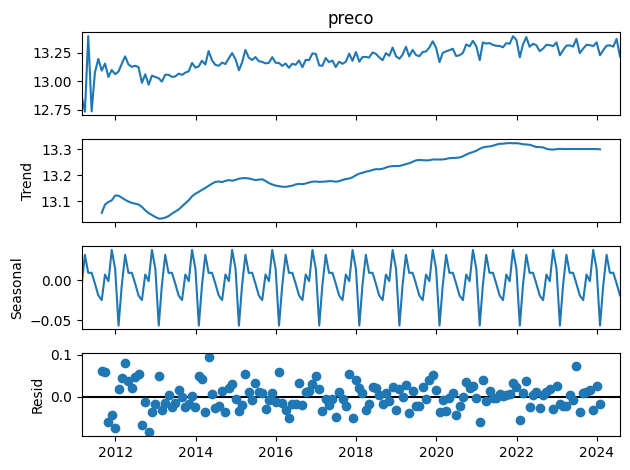

In [37]:
resultado.plot();

Este gráfico indica que o preço está em alta ao longo do tempo e também há sazonalidade.

## Engenharia de Atributos

Vamos adicionar mais duas variáveis de entrada (mais 2 atributos), ano e mês.

In [38]:
df_dsa.head()

,preco,numero_quartos
data_venda,,
2011-02-28,12.874395,4.0
2011-03-31,12.731008,3.0
2011-04-30,13.395763,4.0
2011-05-31,12.733577,3.0
2011-06-30,13.076171,3.0


In [39]:
# Extrai o ano e o mês
df_dsa['ano'] = df_dsa.index.year
df_dsa['mes'] = df_dsa.index.month

In [40]:
df_dsa.head()

,preco,numero_quartos,ano,mes
data_venda,,,,
2011-02-28,12.874395,4.0,2011,2
2011-03-31,12.731008,3.0,2011,3
2011-04-30,13.395763,4.0,2011,4
2011-05-31,12.733577,3.0,2011,5
2011-06-30,13.076171,3.0,2011,6


## Divisão dos Dados em Treino e Teste

In [41]:
# Cria o índice para divisão 80/20
indice = int(len(df_dsa)*.8)

In [42]:
print(len(df_dsa), indice)

162 129


In [43]:
# Dados de treino (mantendo a sequência)
dados_treino = df_dsa.iloc[:indice]

In [44]:
dados_treino.head(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2011-02-28,12.874395,4.0,2011,2


In [45]:
dados_treino.tail(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2021-10-31,13.328343,3.0,2021,10


In [46]:
# Dados de teste (mantendo a sequência)
dados_teste = df_dsa.iloc[indice:]

In [47]:
dados_teste.head(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2021-11-30,13.394882,3.0,2021,11


In [48]:
dados_teste.tail(1)

,preco,numero_quartos,ano,mes
data_venda,,,,
2024-07-31,13.217123,3.0,2024,7


Agora preparamos os dados de entrada e saída. Vamos treinar o modelo como um problema de aprendizado supervisionado.

In [49]:
# Dados de entrada são os atributos
dados_entrada_treino = dados_treino.drop(columns = ['preco'])

In [50]:
dados_entrada_treino.head()

,numero_quartos,ano,mes
data_venda,,,
2011-02-28,4.0,2011,2
2011-03-31,3.0,2011,3
2011-04-30,4.0,2011,4
2011-05-31,3.0,2011,5
2011-06-30,3.0,2011,6


In [51]:
# A variável preco é o que desejamos prever e será nossa variável de saída
dados_saida_treino = dados_treino[['preco']]

In [52]:
dados_saida_treino.head()

,preco
data_venda,
2011-02-28,12.874395
2011-03-31,12.731008
2011-04-30,13.395763
2011-05-31,12.733577
2011-06-30,13.076171


In [53]:
# Inicializar o StandardScaler
scaler = StandardScaler()

In [54]:
# Ajustar e transformar os dados de treino (padronizar)
dados_entrada_treino_scaled = scaler.fit_transform(dados_entrada_treino)

In [55]:
# Transformar o resultado de volta em um DataFrame
dados_entrada_treino_scaled = pd.DataFrame(dados_entrada_treino_scaled, columns=dados_entrada_treino.columns)

## Construção, Treinamento e Avaliação do Modelo

In [56]:
# Cria o modelo
modelo_dsa = LinearRegression()

In [57]:
# Treina o modelo
modelo_dsa.fit(dados_entrada_treino_scaled, dados_saida_treino)

LinearRegression()

In [58]:
# Entrada e saída
dados_entrada_teste = dados_teste.drop(columns = ['preco'])
dados_saida_teste = dados_teste[['preco']]

In [59]:
# Transforma os dados
dados_entrada_teste_scaled = scaler.transform(dados_entrada_teste)

In [60]:
# Converte a saída da padronização em dataframe do Pandas
dados_entrada_teste_scaled = pd.DataFrame(dados_entrada_teste_scaled, columns=dados_entrada_treino.columns)

In [61]:
# Previsões
previsoes = modelo_dsa.predict(dados_entrada_teste_scaled)

In [62]:
print(mean_absolute_error(dados_saida_teste, previsoes))

0.05771747846143911


In [63]:
# Desfaz a transformação de log das previsões
previsoes = np.exp(previsoes)

In [64]:
# Desfaz a transformação de log dos dados de teste
dados_saida_teste = np.exp(dados_saida_teste)

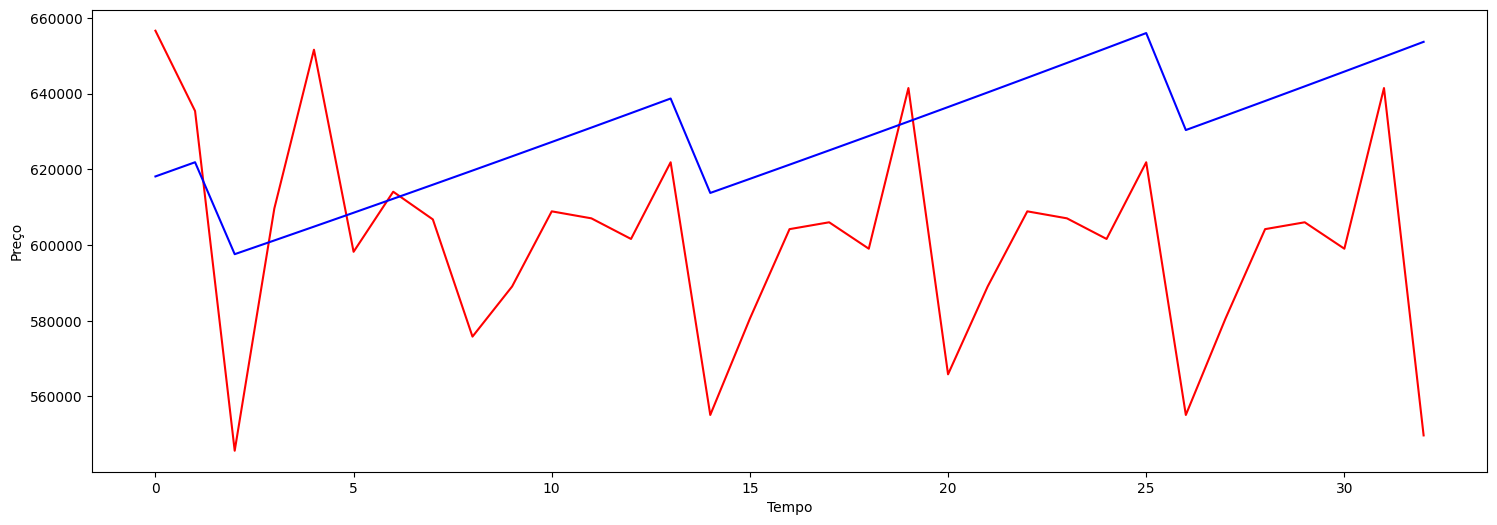

In [65]:
# Plot
plt.figure(figsize = (18,6))
plt.plot(np.array(dados_saida_teste), color = 'red')
plt.plot(np.array(previsoes), color = 'blue')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.show()

In [66]:
# Salva o modelo em disco
filename = 'modelo_dsa.sav'
joblib.dump(modelo_dsa, filename)

['modelo_dsa.sav']

## Forecast com o Modelo Treinado

In [67]:
dados_entrada_teste.tail(1)

,numero_quartos,ano,mes
data_venda,,,
2024-07-31,3.0,2024,7


In [68]:
dados_saida_teste.tail(1)

,preco
data_venda,
2024-07-31,549697.027067


In [69]:
# Novos dados para a previsão
novos_dados = {
    'numero_quartos': [4.0],
    'ano': [2024],
    'mes': [8]
}

In [70]:
# Converte em dataframe
df_novos_dados = pd.DataFrame(novos_dados)

In [71]:
# Ajustar e transformar os dados (padronizar)
df_novos_dados_scaled = scaler.transform(df_novos_dados)

In [72]:
# Índice
data_index = pd.to_datetime('2024-08-31') 

In [73]:
# Organiza o dataframe com o índice
df_novos_dados = pd.DataFrame(df_novos_dados_scaled, index = [data_index])

In [74]:
# Carrega o modelo do disco
modelo_dsa_final = joblib.load(filename)

In [75]:
# Previsão do modelo
previsao_preco = modelo_dsa_final.predict(df_novos_dados)

In [76]:
previsao_preco

array([[13.49768336]])

In [77]:
# Desfaz a transformação de log
previsao_preco = np.exp(previsao_preco)

In [78]:
previsao_preco

array([[727728.53138214]])

In [79]:
# Acessando o valor e formatando a string
arr = previsao_preco
valor = arr[0][0]  # Acessa o valor no array
print(f"Este é o preço previsto do imóvel: {valor:.2f}")

Este é o preço previsto do imóvel: 727728.53


## Desafio - Converter Código Python Para PySpark

Converta o código anterior e crie uma versão com PySpark. Não é necessário converter análise exploratória uma vez que isso normalmente não é feito com Spark.

In [80]:
# Imports
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegressionModel
from pyspark.sql import Window
from pyspark.sql import functions as F
from pyspark.sql.functions import row_number, log, exp

In [81]:
# Inicia a sessão do Spark
spark = SparkSession.builder.appName("Projeto6").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [82]:
# Carrega o dataset com PySpark
df_dsa = spark.read.csv('/opt/spark/dados/dataset.csv', header=True, inferSchema=True)

In [83]:
# Exibe o esquema
df_dsa.printSchema()

root
 |-- data_venda: timestamp (nullable = true)
 |-- preco: integer (nullable = true)
 |-- tipo_imovel: string (nullable = true)
 |-- numero_quartos: integer (nullable = true)



In [84]:
# Amostra dos dados
df_dsa.show(5)

+-------------------+------+-----------+--------------+
|         data_venda| preco|tipo_imovel|numero_quartos|
+-------------------+------+-----------+--------------+
|2011-02-07 00:00:00|525000|       casa|             4|
|2011-02-27 00:00:00|290000|       casa|             3|
|2011-03-07 00:00:00|328000|       casa|             3|
|2011-03-09 00:00:00|380000|       casa|             4|
|2011-03-21 00:00:00|310000|       casa|             3|
+-------------------+------+-----------+--------------+
only showing top 5 rows



O Spark não tem método tail() nativo. Mas podemos fazer isso:

In [85]:
# Definir o número de linhas que você deseja, por exemplo, as últimas 5 linhas
num_linhas = 5

# Contar o número total de linhas no DataFrame
total_linhas = df_dsa.count()

# Pegar as últimas 'num_linhas' linhas, ordenando pela chave ou pelo índice
tail_df = df_dsa.orderBy(df_dsa.columns[0], ascending=False).limit(num_linhas)

# Mostrar o resultado
tail_df.show()

+-------------------+------+-----------+--------------+
|         data_venda| preco|tipo_imovel|numero_quartos|
+-------------------+------+-----------+--------------+
|2024-07-27 00:00:00|647500|       casa|             4|
|2024-07-27 00:00:00|610000|       casa|             4|
|2024-07-27 00:00:00|865000|       casa|             5|
|2024-07-26 00:00:00|610000|       casa|             3|
|2024-07-26 00:00:00|470000|       casa|             3|
+-------------------+------+-----------+--------------+



In [86]:
# Aplica transformação logarítmica à variável alvo
df_dsa = df_dsa.withColumn("log_preco", log("preco"))

In [87]:
# Remove a coluna original de tipo de imóvel
df_dsa = df_dsa.drop("tipo_imovel")

In [88]:
df_dsa.show(5)

+-------------------+------+--------------+------------------+
|         data_venda| preco|numero_quartos|         log_preco|
+-------------------+------+--------------+------------------+
|2011-02-07 00:00:00|525000|             4| 13.17115354157376|
|2011-02-27 00:00:00|290000|             3|12.577636201962656|
|2011-03-07 00:00:00|328000|             3| 12.70076888736628|
|2011-03-09 00:00:00|380000|             4| 12.84792653170257|
|2011-03-21 00:00:00|310000|             3|12.644327576461329|
+-------------------+------+--------------+------------------+
only showing top 5 rows



In [89]:
# Truncar a data para o último dia do mês
df_resampled = df_dsa.withColumn("data_venda", F.last_day("data_venda"))

In [90]:
# Agrupar por mês e calcular a média do preço e do número de quartos
df_resampled = df_resampled.groupBy("data_venda").agg(
    F.mean("log_preco").alias("log_preco"),
    F.round(F.mean("numero_quartos")).cast("int").alias("numero_quartos")  # Arredondar para inteiro
)

In [91]:
# Ordenar por data
df_resampled = df_resampled.orderBy("data_venda")

In [92]:
df_resampled.show(5)

+----------+------------------+--------------+
|data_venda|         log_preco|numero_quartos|
+----------+------------------+--------------+
|2011-02-28|12.874394871768208|             4|
|2011-03-31|12.731007665176726|             3|
|2011-04-30|13.395762557936704|             4|
|2011-05-31|12.733576971123163|             3|
|2011-06-30|13.076170719543924|             3|
+----------+------------------+--------------+
only showing top 5 rows



In [93]:
# Garante que a coluna de data esteja com o tipo timestamp
df_resampled = df_resampled.withColumn("data_venda", col("data_venda").cast("timestamp"))

In [94]:
# Extrai ano e mês
df_resampled = df_resampled.withColumn("ano", year(col("data_venda")))
df_resampled = df_resampled.withColumn("mes", month(col("data_venda")))

In [95]:
# Remove a coluna original de data
df_resampled = df_resampled.drop("data_venda")

In [96]:
# Amostra dos dados
df_resampled.show(5)

+------------------+--------------+----+---+
|         log_preco|numero_quartos| ano|mes|
+------------------+--------------+----+---+
|12.874394871768208|             4|2011|  2|
|12.731007665176726|             3|2011|  3|
|13.395762557936704|             4|2011|  4|
|12.733576971123163|             3|2011|  5|
|13.076170719543924|             3|2011|  6|
+------------------+--------------+----+---+
only showing top 5 rows



In [97]:
# Monta o vetor de características
assembler = VectorAssembler(inputCols=["numero_quartos", "ano", "mes"], outputCol="features")
df_dsa = assembler.transform(df_resampled)

In [98]:
# Amostra dos dados
df_dsa.show(5)

+------------------+--------------+----+---+----------------+
|         log_preco|numero_quartos| ano|mes|        features|
+------------------+--------------+----+---+----------------+
|12.874394871768208|             4|2011|  2|[4.0,2011.0,2.0]|
|12.731007665176726|             3|2011|  3|[3.0,2011.0,3.0]|
|13.395762557936704|             4|2011|  4|[4.0,2011.0,4.0]|
|12.733576971123163|             3|2011|  5|[3.0,2011.0,5.0]|
|13.076170719543924|             3|2011|  6|[3.0,2011.0,6.0]|
+------------------+--------------+----+---+----------------+
only showing top 5 rows



In [99]:
# Adiciona uma coluna de índice para garantir que possamos fazer a divisão em treino e teste mantendo a sequência
window_spec = Window.orderBy("ano", "mes")  
df_dsa = df_dsa.withColumn("row_index", row_number().over(window_spec))

In [100]:
# Amostra dos dados
df_dsa.show(5)

+------------------+--------------+----+---+----------------+---------+
|         log_preco|numero_quartos| ano|mes|        features|row_index|
+------------------+--------------+----+---+----------------+---------+
|12.874394871768208|             4|2011|  2|[4.0,2011.0,2.0]|        1|
|12.731007665176726|             3|2011|  3|[3.0,2011.0,3.0]|        2|
|13.395762557936704|             4|2011|  4|[4.0,2011.0,4.0]|        3|
|12.733576971123163|             3|2011|  5|[3.0,2011.0,5.0]|        4|
|13.076170719543924|             3|2011|  6|[3.0,2011.0,6.0]|        5|
+------------------+--------------+----+---+----------------+---------+
only showing top 5 rows



In [101]:
# Total de linhas para cálculo do índice
total_linhas = df_dsa.count()
indice = int(total_linhas * 0.8)

In [102]:
# Dados de treino (mantendo a sequência)
dados_treino = df_dsa.filter(df_dsa.row_index <= indice)

In [103]:
dados_treino.show(5)

+------------------+--------------+----+---+----------------+---------+
|         log_preco|numero_quartos| ano|mes|        features|row_index|
+------------------+--------------+----+---+----------------+---------+
|12.874394871768208|             4|2011|  2|[4.0,2011.0,2.0]|        1|
|12.731007665176726|             3|2011|  3|[3.0,2011.0,3.0]|        2|
|13.395762557936704|             4|2011|  4|[4.0,2011.0,4.0]|        3|
|12.733576971123163|             3|2011|  5|[3.0,2011.0,5.0]|        4|
|13.076170719543924|             3|2011|  6|[3.0,2011.0,6.0]|        5|
+------------------+--------------+----+---+----------------+---------+
only showing top 5 rows



In [104]:
# Dados de teste (mantendo a sequência)
dados_teste = df_dsa.filter(df_dsa.row_index > indice)

In [105]:
dados_teste.show(5)

+------------------+--------------+----+---+-----------------+---------+
|         log_preco|numero_quartos| ano|mes|         features|row_index|
+------------------+--------------+----+---+-----------------+---------+
|13.394882367108393|             3|2021| 11|[3.0,2021.0,11.0]|      130|
|13.362046842197723|             3|2021| 12|[3.0,2021.0,12.0]|      131|
|13.209734632987496|             3|2022|  1| [3.0,2022.0,1.0]|      132|
|13.320656218291637|             3|2022|  2| [3.0,2022.0,2.0]|      133|
|13.387206025151311|             3|2022|  3| [3.0,2022.0,3.0]|      134|
+------------------+--------------+----+---+-----------------+---------+
only showing top 5 rows



In [106]:
# Inicializa o StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

In [107]:
# Ajusta o scaler com dados de treino
scaler_model = scaler.fit(dados_treino)

In [108]:
# Aplica o scaler em treino e teste
dados_treino_scaled = scaler_model.transform(dados_treino)
dados_teste_scaled = scaler_model.transform(dados_teste)

In [109]:
# Mostra o DataFrame com a nova coluna 'scaledFeatures'
dados_treino_scaled.show(5)

+------------------+--------------+----+---+----------------+---------+--------------------+
|         log_preco|numero_quartos| ano|mes|        features|row_index|      scaledFeatures|
+------------------+--------------+----+---+----------------+---------+--------------------+
|12.874394871768208|             4|2011|  2|[4.0,2011.0,2.0]|        1|[4.51010923053065...|
|12.731007665176726|             3|2011|  3|[3.0,2011.0,3.0]|        2|[-0.2200053283185...|
|13.395762557936704|             4|2011|  4|[4.0,2011.0,4.0]|        3|[4.51010923053065...|
|12.733576971123163|             3|2011|  5|[3.0,2011.0,5.0]|        4|[-0.2200053283185...|
|13.076170719543924|             3|2011|  6|[3.0,2011.0,6.0]|        5|[-0.2200053283185...|
+------------------+--------------+----+---+----------------+---------+--------------------+
only showing top 5 rows



In [110]:
# Cria o modelo
modelo_lr = LinearRegression(featuresCol="scaledFeatures", labelCol="log_preco")

In [111]:
# Treina o modelo
modelo_dsa = modelo_lr.fit(dados_treino_scaled)

In [112]:
# Previsões
previsoes = modelo_dsa.transform(dados_teste_scaled)

In [113]:
# Avaliação do modelo
evaluator = RegressionEvaluator(labelCol="log_preco", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(previsoes)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.057717478461455425


In [114]:
# Salva o modelo
modelo_dsa.write().overwrite().save("modelo_dsa")

In [115]:
# Novos dados para a previsão
novos_dados = spark.createDataFrame([(4.0, 2024, 8)], ["numero_quartos", "ano", "mes"])

In [116]:
# Ajusta o formato dos dados como fizemos em treino
novos_dados_transformed = assembler.transform(novos_dados)

In [117]:
novos_dados_transformed.show(5)

+--------------+----+---+----------------+
|numero_quartos| ano|mes|        features|
+--------------+----+---+----------------+
|           4.0|2024|  8|[4.0,2024.0,8.0]|
+--------------+----+---+----------------+



In [118]:
# Aplica a padronização como fizemos em treino
novos_dados_transformed_scaled = scaler_model.transform(novos_dados_transformed)

In [119]:
novos_dados_transformed_scaled.show(5)

+--------------+----+---+----------------+--------------------+
|numero_quartos| ano|mes|        features|      scaledFeatures|
+--------------+----+---+----------------+--------------------+
|           4.0|2024|  8|[4.0,2024.0,8.0]|[4.51010923053065...|
+--------------+----+---+----------------+--------------------+



In [120]:
# Carrega o modelo salvo
modelo_dsa_carregado = LinearRegressionModel.load("modelo_dsa")

In [121]:
previsao_preco = modelo_dsa_carregado.transform(novos_dados_transformed_scaled)

In [122]:
# Faz a previsão
previsao_preco.select("prediction").show()

+------------------+
|        prediction|
+------------------+
|13.497683361182565|
+------------------+



In [123]:
previsao_preco = previsao_preco.withColumn("previsao_final", exp("prediction"))

In [124]:
# Faz a previsão
previsao_preco.select("previsao_final").show()

+-----------------+
|   previsao_final|
+-----------------+
|727728.5313821528|
+-----------------+



Trabalho concluído, modelo criado, previsão entregue, cliente feliz, partimos para o próximo projeto!

# Fim